In [1]:
import analysis.wdt as wdt
import analysis.plot_tools as fom_plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/josh/lib/anaconda2/lib/python2.7/site-packages/pyne/serpent.py:11: QAWarning: pyne.serpent is not yet QA compliant.
  warn(__name__ + " is not yet QA compliant.", QAWarning)


In [2]:
data_dir  = '/home/josh/repos/_wdt/wdt_data/'

In [3]:
t_wdt = [0.2]

base = data_dir + 'pwr/S0100/'
dirs = [base + 'W' + str('{:0>4d}'.format(int(n*1000))) for n in t_wdt]
pwr_comp = wdt.SerpentRun(dirs[0],params=[('twdt',0.2)])

Uploaded 630 files.


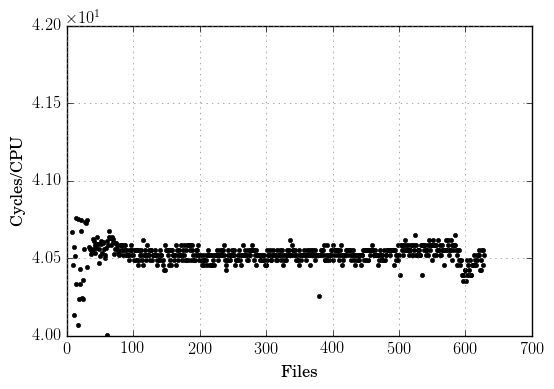

In [34]:
cycvcpu = pwr_comp.cyc_v_cpu()
plt.plot(cycvcpu,'.k')
fom_plot.fom_plot_setup(12,12)
plt.ylim([40,42])
plt.ylabel('Cycles/CPU')
plt.xlabel('Files')
plt.show()
pwr_comp.cyc_cpu = np.average(cycvcpu[100:])

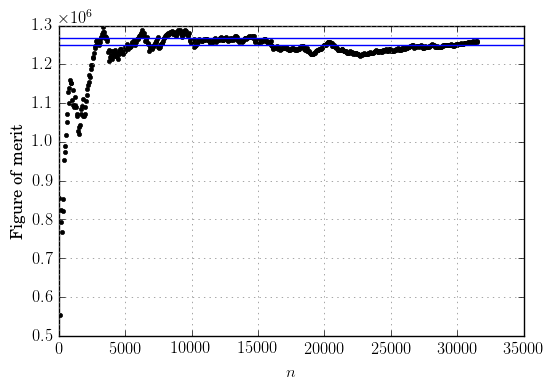

In [46]:
x = pwr_comp.cycles
y = pwr_comp.fom('INF_FLX',1)
y_err = pwr_comp.fom_std('INF_FLX',1)
y_corr = pwr_comp.fom_corr('INF_FLX',1)
#plt.plot(x,y,'.k', x, y_corr, '.r')
plt.plot(x,y,'.k')
plt.axhline(y=y[-1]-y_err)
plt.axhline(y=y[-1]+y_err)
fom_plot.fom_plot_setup(12,12)
plt.show()

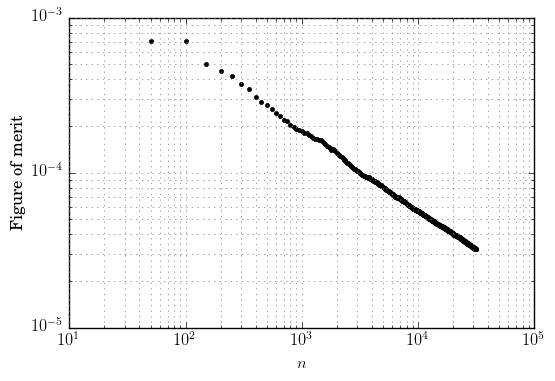

In [42]:
err = pwr_comp.get_error('INF_FLX',1)
plt.plot(x,err,'.k')
fom_plot.fom_plot_setup(12,12)
plt.yscale('log')
plt.xscale('log')
plt.show()